In [ ]:
# Check GPU status
!nvidia-smi


Thu Aug 15 18:00:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               8W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
# Install necessary libraries
!pip install torch torchvision torchaudio
!pip install torch-geometric
!pip install tikzplotlib
!pip install grape
!pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setu

In [1]:
# basics
import numpy as np
import pandas as pd
import tensorflow as tf

# math
from math import ceil
from math import log
from math import log10

# utils
import itertools as it
import time
#from varname import nameof # get the name of a variable
import pickle
from tqdm.auto import tqdm, trange
#from tqdm import tqdm  RuntimeError: CUDA error: device-side assert triggered
import inspect
from grape.datasets.linqs import get_words_data # words information is excluded
from sklearn.preprocessing import LabelEncoder


# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import tikzplotlib
#from barplots import barplots
import matplotlib.colors as colors
import seaborn as sns
from sklearn.manifold import TSNE


# torch geometrics
import torch
import torch.optim as optim

from torch_geometric.datasets import FB15k_237
from torch_geometric.nn import ComplEx, DistMult, RotatE, TransE
from torch_geometric.data import Data

import os.path as osp

# Convolutional GNN
import torch_geometric.transforms as T

from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from torch_geometric.utils import negative_sampling
from torch_geometric.loader import LinkNeighborLoader
from torch_geometric.transforms import RandomLinkSplit

from sklearn.metrics import roc_auc_score
# # Grape

2024-11-15 17:08:13.362537: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-15 17:08:13.412427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-15 17:08:14.134383: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/khushboo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook

In [2]:
# # Grape
# from grape.datasets import get_all_available_graphs_dataframe
# from grape.datasets import get_dataset
from grape import Graph
from grape import GraphVisualizer

# # Ensmallen
# from grape.embedders import Node2VecCBOWEnsmallen, Node2VecGloVeEnsmallen, Node2VecSkipGramEnsmallen
# from grape.embedders import DeepWalkCBOWEnsmallen, DeepWalkGloVeEnsmallen, DeepWalkSkipGramEnsmallen
# from grape.embedders import WalkletsSkipGramEnsmallen, WalkletsCBOWEnsmallen, WalkletsGloVeEnsmallen
# from grape.embedders import FirstOrderLINEEnsmallen, SecondOrderLINEEnsmallen
# #from grape.embedders import NetMFEnsmallen, GLEEEnsmallen, HOPEEnsmallen
from grape.embedders import TransEEnsmallen

# # TensorFlow
# from grape.embedders import SkipGramTensorFlow, CBOWTensorFlow
# from grape.embedders import FirstOrderLINETensorFlow, SecondOrderLINETensorFlow

# # KarateClub
# from grape.embedders import Role2VecKarateClub, GraRepKarateClub
# from grape.embedders import NMFADMMKarateClub, RandNEKarateClub


# # Edge prediction evaluation
from grape.edge_prediction import edge_prediction_evaluation
from grape.edge_prediction import DecisionTreeEdgePrediction, RandomForestEdgePrediction, ExtraTreesEdgePrediction, MLPEdgePrediction, GradientBoostingEdgePrediction,PerceptronEdgePrediction

# from grape.edge_prediction import KipfGCNEdgePrediction

# # Node Label prediction evaluation
# from grape.node_label_prediction import node_label_prediction_evaluation
# from grape.node_label_prediction import DecisionTreeNodeLabelPrediction, RandomForestNodeLabelPrediction, MLPNodeLabelPrediction, GradientBoostingNodeLabelPrediction#, PerceptronNodeLabelPrediction

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# Load graph
view=3
view_name='VIEW'+str(view)
results = pd.DataFrame()

# Load graph
view_path='/home/khushboo/VIEW3/VIEW'+str(view)+"/"

nodes_df = pd.read_pickle(view_path+"nodes.pkl")
edges_df = pd.read_pickle(view_path+"edges.pkl")

In [5]:
# TRAIN DATASET

nodes_df.to_csv(view_path+"nodes.csv", header=False, index=False, sep='\t')
edges_df.to_csv(view_path+"edges.csv", header=False, index=False, sep='\t')

In [6]:
# IMPORT METHODS

# One-hot encoding of the types
class TypeOneHotEncoder:
    def __init__(self, sep='|'):
        self.sep = sep

    def __call__(self, df):
        types = set(g for col in df.values for g in col.split(self.sep))
        mapping = {type: i for i, type in enumerate(types)}

        x = torch.zeros(len(df), len(mapping))
        for i, col in enumerate(df.values):
            for type in col.split(self.sep):
                x[i, mapping[type]] = 1
        return x

# Integer encoding for types
class TypeIntegerEncoder:
    def __init__(self, sep='|'):
        self.sep = sep

    def __call__(self, df):
        types = set(g for col in df.values for g in col.split(self.sep))
        mapping = {type: i for i, type in enumerate(types)}

        x = torch.zeros(len(df), 1)
        for i, type in enumerate(df.values):
                x[i] = mapping[type]
        return x.to(torch.float)

In [7]:
def load_node_df(df, index_col, encoders=None, **kwargs):

    # Integer encoding for the types
    type_mapping: Dict[str, int] = {}

    df = df.set_index(index_col)
    # Create te mapping for the index
    mapping = {index: i for i, index in enumerate(df.index.unique())}

    # Create the features for the nodes
    x = None
    if encoders is not None:
        xs = [encoder(df[col]) for col, encoder in encoders.items()]
        x = torch.cat(xs, dim=-1)

    return x, mapping

def load_edge_df(df, src_index_col, src_mapping, dst_index_col, dst_mapping,
                 pred_index_col=None, pred_mapping=None, encoders=None, **kwargs):

    src = [src_mapping[index] for index in df[src_index_col]]
    dst = [dst_mapping[index] for index in df[dst_index_col]]
    edge_index = torch.tensor([src, dst])

    # Edge Types
    edge_attr = None
    # Edge mapping
    if pred_mapping is not None:
        edge_attrs = torch.zeros(len(df), 1)
        for i, type in enumerate(df[pred_index_col].values):
            edge_attrs[i] = pred_mapping[type]
        edge_attr = edge_attrs.to(torch.int64)
    # No mapping but encoder
    if encoders is not None:
        edge_attrs = [encoder(df[col]) for col, encoder in encoders.items()]
        edge_attr = torch.cat(edge_attrs, dim=-1)

    return edge_index, edge_attr

In [ ]:
# Train

nodes_x, node_mapping = load_node_df(nodes_df, index_col='name',
                                     encoders={'type': TypeIntegerEncoder()}
                                    )

# Edge type mapping (same for train/test)
pred_mapping = {index: i for i, index in enumerate(edges_df.predicate.unique())}

edge_index, edge_type = load_edge_df(
    edges_df,
    src_index_col='subject', src_mapping = node_mapping,
    dst_index_col='object', dst_mapping = node_mapping,
    pred_index_col='predicate', pred_mapping = pred_mapping,
     # encoders={
     #     'predicate': TypeIntegerEncoder()
     #     }
    )

# train_data = Data(x=nodes_x,
#                   edge_index=edge_index, edge_type=edge_type,
#                   edge_label_index=edge_index,
#                   edge_label=torch.ones(edge_index.size(1))
#                     )

# train_data = train_data.to(device)

In [ ]:
data = Data(x=nodes_x, edge_index=edge_index, edge_type=edge_type)

transform = RandomLinkSplit(is_undirected=False)

train_data, val_data, test_data = transform(data)

train_data = train_data.to(device)
test_data = test_data.to(device)
val_data = val_data.to(device)

In [ ]:
print(f"Edges Train: {len(train_data.edge_label_index[0])}  Test:{len(test_data.edge_label_index[0])}  Validation: {len(val_data.edge_label_index[0])}")

Edges Train: 2378758  Test:679644  Validation: 339822


In [ ]:
# Model

model = TransE(
    num_nodes=train_data.num_nodes,
    num_relations=train_data.num_edge_types,
    hidden_channels=50, # The hidden embedding size.
).to(device)

loader = model.loader(
    head_index=train_data.edge_index[0],
    rel_type=train_data.edge_type,
    tail_index=train_data.edge_index[1],
    batch_size=1000,
    shuffle=True,
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

# ALTERNATIVE MODELS

# model_map = {
#     'transe': TransE,
#     'complex': ComplEx,
#     'distmult': DistMult,
#     'rotate': RotatE,
# }

# Proposed configurations
# optimizer_map = {
#     'transe': optim.Adam(model.parameters(), lr=0.01),
#     'complex': optim.Adagrad(model.parameters(), lr=0.001, weight_decay=1e-6),
#     'distmult': optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-6),
#     'rotate': optim.Adam(model.parameters(), lr=1e-3),
# }

In [ ]:
# Training definitions

def train():
    model.train()
    total_loss = total_examples = 0
    for head_index, rel_type, tail_index in loader:
        optimizer.zero_grad()
        loss = model.loss(head_index, rel_type, tail_index)
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * head_index.numel()
        total_examples += head_index.numel()
    return total_loss / total_examples


@torch.no_grad()
def test(data):
    model.eval()
    return model.test(
        head_index=data.edge_index[0],
        rel_type=data.edge_type,
        tail_index=data.edge_index[1],
        batch_size=20000,
        k=10,
    )

@torch.no_grad()
def get_prob(data):
    model.eval()
    z = model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()
    return out.cpu().numpy()

In [ ]:
# Training
n_epochs=26

for epoch in range(1, n_epochs):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    if epoch % 25 == 0:
        rank, mrr, hits = test(val_data)
        print(f'Epoch: {epoch:03d}, Val Mean Rank: {rank:.2f}, '
        f'Val MRR: {mrr:.4f}, Val Hits@10: {hits:.4f}')

Epoch: 001, Loss: 0.3348
Epoch: 002, Loss: 0.2327
Epoch: 003, Loss: 0.2230
Epoch: 004, Loss: 0.2158
Epoch: 005, Loss: 0.2108
Epoch: 006, Loss: 0.2050
Epoch: 007, Loss: 0.2003
Epoch: 008, Loss: 0.1965
Epoch: 009, Loss: 0.1938
Epoch: 010, Loss: 0.1905
Epoch: 011, Loss: 0.1881
Epoch: 012, Loss: 0.1864
Epoch: 013, Loss: 0.1837
Epoch: 014, Loss: 0.1822
Epoch: 015, Loss: 0.1804
Epoch: 016, Loss: 0.1788
Epoch: 017, Loss: 0.1777
Epoch: 018, Loss: 0.1765
Epoch: 019, Loss: 0.1751
Epoch: 020, Loss: 0.1744
Epoch: 021, Loss: 0.1724
Epoch: 022, Loss: 0.1720
Epoch: 023, Loss: 0.1701
Epoch: 024, Loss: 0.1695
Epoch: 025, Loss: 0.1689


100%|██████████| 1189379/1189379 [39:34<00:00, 500.92it/s]


Epoch: 025, Val Mean Rank: 6142.33, Val MRR: 0.0048, Val Hits@10: 0.0086


In [ ]:
# Training
n_epochs=26

for epoch in range(1, n_epochs):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    if epoch % 25 == 0:
        rank, mrr, hits = test(val_data)
        print(f'Epoch: {epoch:03d}, Val Mean Rank: {rank:.2f}, '
        f'Val MRR: {mrr:.4f}, Val Hits@10: {hits:.4f}')

Epoch: 001, Loss: 0.1681
Epoch: 002, Loss: 0.1676
Epoch: 003, Loss: 0.1670
Epoch: 004, Loss: 0.1659
Epoch: 005, Loss: 0.1653
Epoch: 006, Loss: 0.1646
Epoch: 007, Loss: 0.1633
Epoch: 008, Loss: 0.1634
Epoch: 009, Loss: 0.1624
Epoch: 010, Loss: 0.1615
Epoch: 011, Loss: 0.1615
Epoch: 012, Loss: 0.1604
Epoch: 013, Loss: 0.1602
Epoch: 014, Loss: 0.1596
Epoch: 015, Loss: 0.1591
Epoch: 016, Loss: 0.1590
Epoch: 017, Loss: 0.1589
Epoch: 018, Loss: 0.1587
Epoch: 019, Loss: 0.1574
Epoch: 020, Loss: 0.1566
Epoch: 021, Loss: 0.1567
Epoch: 022, Loss: 0.1564
Epoch: 023, Loss: 0.1564
Epoch: 024, Loss: 0.1556
Epoch: 025, Loss: 0.1541


100%|██████████| 1189379/1189379 [39:30<00:00, 501.84it/s]


Epoch: 025, Val Mean Rank: 5839.24, Val MRR: 0.0049, Val Hits@10: 0.0107


In [ ]:
# Training
n_epochs=101

for epoch in range(1, n_epochs):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    if epoch % 100 == 0:
        rank, mrr, hits = test(val_data)
        print(f'Epoch: {epoch:03d}, Val Mean Rank: {rank:.2f}, '
        f'Val MRR: {mrr:.4f}, Val Hits@10: {hits:.4f}')

Epoch: 001, Loss: 0.1547
Epoch: 002, Loss: 0.1547
Epoch: 003, Loss: 0.1536
Epoch: 004, Loss: 0.1537
Epoch: 005, Loss: 0.1533
Epoch: 006, Loss: 0.1536
Epoch: 007, Loss: 0.1527
Epoch: 008, Loss: 0.1522
Epoch: 009, Loss: 0.1515
Epoch: 010, Loss: 0.1518
Epoch: 011, Loss: 0.1512
Epoch: 012, Loss: 0.1511
Epoch: 013, Loss: 0.1505
Epoch: 014, Loss: 0.1501
Epoch: 015, Loss: 0.1502
Epoch: 016, Loss: 0.1499
Epoch: 017, Loss: 0.1498
Epoch: 018, Loss: 0.1494
Epoch: 019, Loss: 0.1498
Epoch: 020, Loss: 0.1494
Epoch: 021, Loss: 0.1494
Epoch: 022, Loss: 0.1485
Epoch: 023, Loss: 0.1480
Epoch: 024, Loss: 0.1473
Epoch: 025, Loss: 0.1483
Epoch: 026, Loss: 0.1476
Epoch: 027, Loss: 0.1474
Epoch: 028, Loss: 0.1472
Epoch: 029, Loss: 0.1464
Epoch: 030, Loss: 0.1461
Epoch: 031, Loss: 0.1462
Epoch: 032, Loss: 0.1463
Epoch: 033, Loss: 0.1461
Epoch: 034, Loss: 0.1458
Epoch: 035, Loss: 0.1459
Epoch: 036, Loss: 0.1456
Epoch: 037, Loss: 0.1446
Epoch: 038, Loss: 0.1446
Epoch: 039, Loss: 0.1445
Epoch: 040, Loss: 0.1445


100%|██████████| 1189379/1189379 [39:33<00:00, 501.19it/s]


Epoch: 100, Val Mean Rank: 5395.93, Val MRR: 0.0062, Val Hits@10: 0.0131


In [ ]:
# Testing
rank, mrr, hits_at_10 = test(test_data)
print(f'Test Mean Rank: {rank:.2f}, Test MRR: {mrr:.4f}, '
 f'Test Hits@10: {hits_at_10:.4f}')

100%|██████████| 1359290/1359290 [45:04<00:00, 502.69it/s]


Test Mean Rank: 5622.09, Test MRR: 0.0062, Test Hits@10: 0.0130


In [ ]:
## EXTERNAL TEST SETS

## VIEW 0-2
test_sets = ['miRNA-disease2bepred']
test_df = pd.read_csv(view_path+test_sets[0]+".txt", sep='\t')

## VIEW 3-5
#test_df = pd.read_csv(view_path+"miRNA-disease2bepred.txt", sep='\t')
#test_sets = ['miRNA-disease2bepred']
#test_sets = ['SPIRES_FN','SPIRES_FP','SPIRES_TP']

## VIEW 6-8
#test_df = pd.read_csv(view_path+"miRNA-gene2bepred.txt", sep='\t')
#test_sets = ['SPIRES_FN','SPIRES_FP','SPIRES_TP']

## VIEW 12-15 NO HEADERS!!
#test_df = pd.read_csv(view_path+"test-.txt",names=["subject","predicate","object"], sep='\t')

In [ ]:
# Remove edges with unknown nodes
sources_in_graph = test_df.subject.apply(lambda x: x in nodes_df.name.values)
destinations_in_graph = test_df.object.apply(lambda x: x in nodes_df.name.values)

edge_extremes_in_graph = [a and b for a, b in zip(sources_in_graph, destinations_in_graph)]

print([[x,edge_extremes_in_graph.count(x)] for x in set(edge_extremes_in_graph)])

edges_to_predict_filtered = test_df[edge_extremes_in_graph]

test_edge_index, test_edge_type = load_edge_df(
    edges_to_predict_filtered,
    src_index_col='subject', src_mapping = node_mapping,
    dst_index_col='object', dst_mapping = node_mapping,
    pred_index_col='predicate', pred_mapping = pred_mapping,
     # encoders={
     #     'predicate': TypeIntegerEncoder()
     #     }
    )

external_test_data = Data(x=nodes_x,
                 edge_index=test_edge_index,
                 edge_type=test_edge_type,
                 edge_label_index=test_edge_index,
                 edge_label=torch.ones(test_edge_index.size(1))
                ).to(device)

[[False, 192], [True, 8419]]


In [ ]:
rank, mrr, hits_at_10 = test(external_test_data)
print(f'Test Mean Rank: {rank:.2f}, Test MRR: {mrr:.4f}, '
 f'Test Hits@10: {hits_at_10:.4f}')

100%|██████████| 8419/8419 [00:16<00:00, 502.03it/s]

Test Mean Rank: 3542.56, Test MRR: 0.0249, Test Hits@10: 0.0601


In [ ]:
node_embedding = pd.DataFrame(model.node_emb.weight.cpu().detach().numpy())

label_encoder = LabelEncoder()
node_types = label_encoder.fit_transform(list(nodes_df.type))
node_embedding.index = nodes_df
len(node_embedding)

87357

In [ ]:
node_embedding

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
"(<http://purl.obolibrary.org/obo/HP_0010945>, Phenotype)",0.318678,0.241065,-0.114149,0.004559,-0.142010,0.008092,-0.005465,0.001860,-0.009657,0.120804,...,0.004553,-0.206098,16.061012,0.118366,-0.192883,0.008609,0.293380,0.004058,0.003489,0.197519
"(<https://www.mirbase.org/mature/MIMAT0027026>, miRNA)",-6.229069,2.356272,-3.016757,-2.354459,-2.596726,2.368507,2.696531,4.122850,2.512260,3.576027,...,-3.766797,-2.217538,-0.148617,1.999883,1.531965,-3.468723,-2.056022,-3.291990,-3.724658,-3.664973
"(<http://purl.obolibrary.org/obo/MONDO_0000996>, Disease)",-7.069206,-0.289056,-0.605228,-0.664865,-0.826212,0.688359,0.651433,0.686422,0.688414,0.780215,...,-0.772065,0.113196,-7.566194,0.808899,0.667186,-0.796050,-0.269580,-0.689116,-0.689072,-0.685040
"(<http://purl.obolibrary.org/obo/UBERON_0003831>, Anatomy)",13.186947,0.046509,0.191302,-0.000339,0.027727,-0.000924,-0.192165,-0.195660,-0.023881,0.000042,...,0.189474,-0.081555,-8.759291,-0.190660,-0.054977,0.022456,0.085588,0.021010,0.024157,0.044145
"(<https://www.mirbase.org/hairpin/MI0031521>, miRNA)",5.397562,1.126016,-1.714152,-0.535514,-2.650707,2.483349,2.345813,0.576723,0.073733,0.233663,...,-0.246929,0.939015,-17.970146,0.555553,0.564999,-2.408346,-1.346488,-1.661703,-2.067598,-0.238233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(<http://purl.obolibrary.org/obo/MONDO_0021636>, Disease)",-0.073851,-0.117232,0.377251,1.489641,0.913257,-1.010285,-0.590626,-1.527553,-1.154443,-0.350527,...,1.457601,0.085109,-0.232343,-0.284717,-0.438090,1.605469,-0.104386,0.519913,0.906459,0.891858
"(<http://purl.obolibrary.org/obo/MONDO_0012749>, Disease)",-15.930866,-0.489860,-0.557691,-0.654133,-0.619402,0.653177,0.615910,0.646781,0.643517,0.653504,...,-0.628624,0.519128,0.275652,0.626760,0.602336,-0.643420,-0.567725,-0.576269,-0.572060,-0.654138
"(<http://www.ncbi.nlm.nih.gov/gene/80099>, Gene)",-28.408642,-0.145086,-0.222753,-0.238444,-0.190494,0.111535,0.235847,0.250415,0.195651,0.249619,...,-0.222450,0.235288,15.042208,0.249514,0.244297,-0.242332,-0.095443,-0.152279,-0.227089,-0.230985
"(<http://purl.obolibrary.org/obo/HP_0100788>, Phenotype)",8.085023,-0.180239,-0.443923,-0.565179,-0.548424,0.578302,0.452068,0.577797,0.586960,0.476268,...,-0.544232,0.078635,-13.893661,0.579113,0.433715,-0.472686,-0.098406,-0.572433,-0.480726,-0.534801


In [ ]:
node_embedding.to_csv('node_embeddings.csv', header=False, index=True, sep=',')

In [ ]:
%matplotlib inline

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h)

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

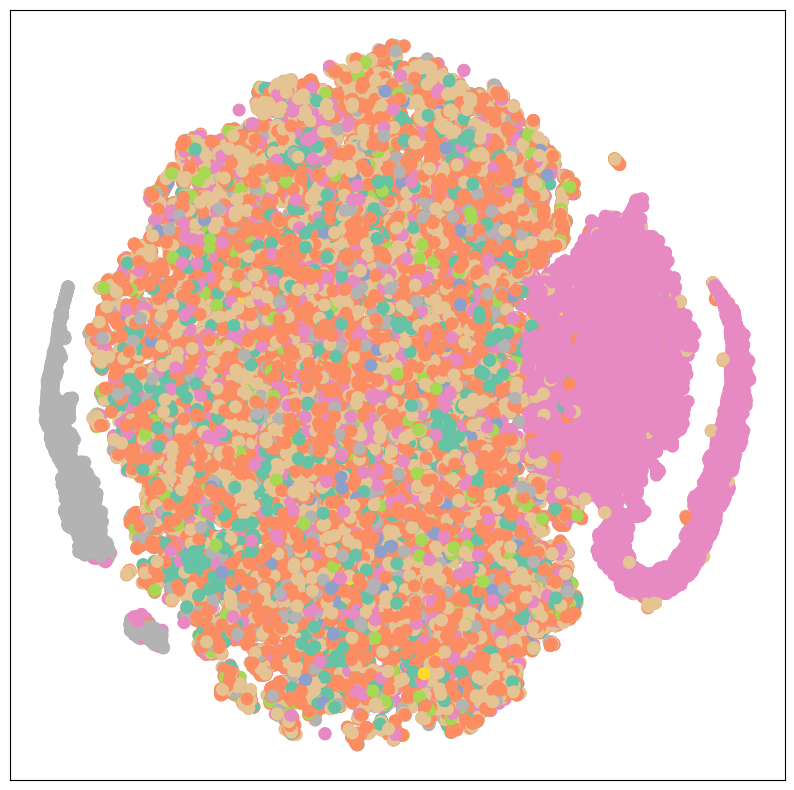

In [ ]:
visualize(node_embedding,node_types)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, node_types):
    z = TSNE(n_components=2).fit_transform(h)

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])
    unique_node_types = np.unique(node_types)
    palette = sns.color_palette("tab20", len(unique_node_types))

    # Create a dictionary mapping each node type to a color
    node_type_to_color = {node_type: palette[i] for i, node_type in enumerate(unique_node_types)}

    # Map the colors for each node based on its type
    node_colors = [node_type_to_color[node_type] for node_type in node_types]
    scatter = plt.scatter(z[:, 0], z[:, 1], s=70, c=node_colors, cmap="tab20")




    # Create legend manually
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in palette]
    plt.legend(handles, unique_node_types, title="Node Types", loc='best')
    plt.show()

In [10]:
y= nodes_df['type'].astype('category').cat.codes

/tmp/ipykernel_200515/1780641566.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(z[:, 0], z[:, 1], s=70, c=node_colors, cmap="tab20")


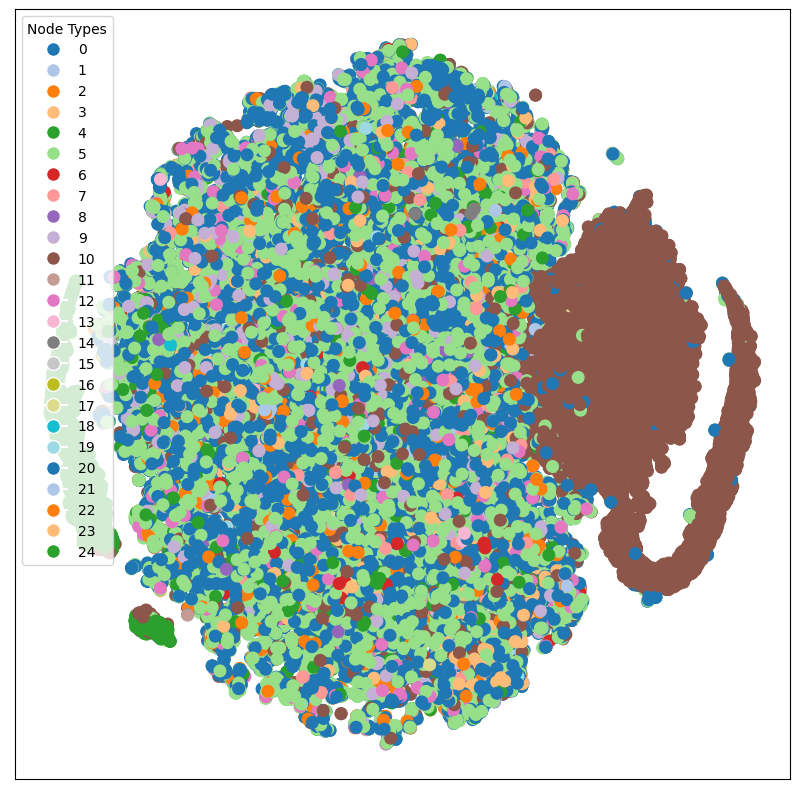

In [11]:
visualize(embeddings.values,y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Prepare the labels
true_labels = nodes_df['type']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the features and labels
X = node_embedding.values
y = true_labels

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5509386446886447
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                           precision    recall  f1-score   support

                  Anatomy       0.51      0.25      0.34      1772
                     Cell       0.00      0.00      0.00       364
                 Chemical       0.69      0.07      0.13       661
               Chromosome       0.00      0.00      0.00        93
                  Disease       0.42      0.72      0.53      7344
              Environment       0.00      0.00      0.00       141
   Environmental exposure       0.00      0.00      0.00       131
                     Food       0.00      0.00      0.00        50
                       GO       0.51      0.05      0.09      1169
                     Gene       0.94      0.91      0.92      5831
  General medical science       0.00      0.00      0.00         2
          Genomic feature       1.00      0.01      0.02       742
Human developmental stage       1.00      0.05      0.10        19
           Medical action       0.00      0.00      0.00     

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.5509
Precision: 0.5646
Recall: 0.5509


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

selected_classes = ['miRNA', 'Gene', 'Disease']

filtered_embeddings = []
filtered_labels = []


for class_label in selected_classes:

    class_indices = nodes_df[nodes_df['type'] == class_label].index


    class_embeddings = embeddings.iloc[class_indices, 1:].values  # Skip the first column with identifiers

    # Append the filtered embeddings and labels
    filtered_embeddings.append(class_embeddings)
    filtered_labels.extend([class_label] * len(class_embeddings))


X_filtered = np.vstack(filtered_embeddings)

# Encode the labels
le = LabelEncoder()
y_filtered = le.fit_transform(filtered_labels)  # Convert the labels into numerical form


X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

precision_per_class = precision_score(y_test, y_pred, average=None, labels=np.unique(y_filtered))
recall_per_class = recall_score(y_test, y_pred, average=None, labels=np.unique(y_filtered))

for i, class_label in enumerate(le.classes_):
    if class_label in selected_classes:
        print(f"Class: {class_label}")
        print(f"  Precision: {precision_per_class[i]:.4f}")
        print(f"  Recall: {recall_per_class[i]:.4f}")


Accuracy: 0.9192
Precision: 0.9212
Recall: 0.9192
Class: Disease
  Precision: 0.8921
  Recall: 0.9662
Class: Gene
  Precision: 0.9591
  Recall: 0.9021
Class: miRNA
  Precision: 0.9152
  Recall: 0.7496


In [6]:
rna_kg_graph = Graph.from_pd(
    edges_df=edges_df,
    nodes_df=nodes_df,
    node_name_column="name",
    node_type_column="type",
    edge_src_column="subject",
    edge_dst_column="object",
    #edge_weight_column="weight",
    edge_type_column="type",
    node_types_separator="|",
    directed=False,
    name=view_name,
)

rna_kg_graph_directed = Graph.from_pd(
    edges_df=edges_df,
    nodes_df=nodes_df,
    node_name_column="name",
    node_type_column="type",
    edge_src_column="subject",
    edge_dst_column="object",
    #edge_weight_column="weight",
    edge_type_column="type",
    node_types_separator="|",
    directed=True,
    name=view_name+"_directed",
)

In [7]:
embeddings = pd.read_csv('/home/khushboo/embeddings/view3_tsne_node_embeddings.csv', header = None)

In [8]:
embeddings

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,('<http://purl.obolibrary.org/obo/HP_0010945>'...,0.318678,0.241065,-0.114149,0.004559,-0.142010,0.008092,-0.005465,0.001860,-0.009657,...,0.004553,-0.206098,16.061012,0.118366,-0.192883,0.008609,0.293380,0.004058,0.003489,0.197519
1,('<https://www.mirbase.org/mature/MIMAT0027026...,-6.229069,2.356272,-3.016757,-2.354459,-2.596726,2.368507,2.696531,4.122850,2.512260,...,-3.766797,-2.217538,-0.148617,1.999883,1.531965,-3.468723,-2.056022,-3.291990,-3.724658,-3.664973
2,('<http://purl.obolibrary.org/obo/MONDO_000099...,-7.069206,-0.289056,-0.605228,-0.664865,-0.826212,0.688359,0.651433,0.686422,0.688414,...,-0.772065,0.113196,-7.566194,0.808899,0.667186,-0.796050,-0.269580,-0.689116,-0.689072,-0.685040
3,('<http://purl.obolibrary.org/obo/UBERON_00038...,13.186947,0.046509,0.191302,-0.000339,0.027727,-0.000924,-0.192165,-0.195660,-0.023881,...,0.189474,-0.081555,-8.759291,-0.190660,-0.054977,0.022456,0.085588,0.021010,0.024157,0.044145
4,('<https://www.mirbase.org/hairpin/MI0031521>'...,5.397562,1.126016,-1.714152,-0.535514,-2.650707,2.483349,2.345813,0.576723,0.073733,...,-0.246929,0.939015,-17.970146,0.555553,0.564999,-2.408346,-1.346488,-1.661703,-2.067598,-0.238233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87352,('<http://purl.obolibrary.org/obo/MONDO_002163...,-0.073851,-0.117232,0.377251,1.489641,0.913257,-1.010285,-0.590626,-1.527553,-1.154443,...,1.457601,0.085109,-0.232343,-0.284717,-0.438090,1.605468,-0.104386,0.519913,0.906459,0.891858
87353,('<http://purl.obolibrary.org/obo/MONDO_001274...,-15.930866,-0.489860,-0.557691,-0.654133,-0.619402,0.653177,0.615910,0.646781,0.643517,...,-0.628624,0.519128,0.275652,0.626760,0.602336,-0.643420,-0.567724,-0.576269,-0.572060,-0.654138
87354,"('<http://www.ncbi.nlm.nih.gov/gene/80099>', '...",-28.408642,-0.145086,-0.222753,-0.238444,-0.190494,0.111535,0.235847,0.250415,0.195651,...,-0.222450,0.235288,15.042208,0.249514,0.244297,-0.242332,-0.095443,-0.152279,-0.227089,-0.230985
87355,('<http://purl.obolibrary.org/obo/HP_0100788>'...,8.085023,-0.180239,-0.443923,-0.565179,-0.548424,0.578302,0.452068,0.577797,0.586960,...,-0.544232,0.078635,-13.893661,0.579113,0.433715,-0.472686,-0.098406,-0.572433,-0.480726,-0.534801


In [9]:
embeddings.set_index(embeddings.columns[0], inplace=True)

In [10]:
graph = rna_kg_graph_directed
# Function to simplify node names
def simplify_node_names(graph):
    simplified_node_names = [name[0] for name in graph.get_node_names()]
    return simplified_node_names

# Apply to the graph
simplified_node_names = simplify_node_names(graph)

In [11]:
embeddings.index = [name[0] for name in embeddings.index]

In [12]:
embeddings.values

array([[ 3.1867757e-01,  2.4106503e-01, -1.1414946e-01, ...,
         4.0584276e-03,  3.4888822e-03,  1.9751938e-01],
       [-6.2290690e+00,  2.3562722e+00, -3.0167565e+00, ...,
        -3.2919903e+00, -3.7246583e+00, -3.6649725e+00],
       [-7.0692058e+00, -2.8905568e-01, -6.0522795e-01, ...,
        -6.8911564e-01, -6.8907230e-01, -6.8504000e-01],
       ...,
       [-2.8408642e+01, -1.4508605e-01, -2.2275344e-01, ...,
        -1.5227893e-01, -2.2708899e-01, -2.3098464e-01],
       [ 8.0850230e+00, -1.8023895e-01, -4.4392338e-01, ...,
        -5.7243320e-01, -4.8072577e-01, -5.3480070e-01],
       [-1.5492005e+01, -2.1336384e-01, -4.6565416e-01, ...,
        -4.9481988e-01, -4.8315665e-01, -7.5893150e-01]])

In [16]:
evaluation = edge_prediction_evaluation(
    holdouts_kwargs=dict(train_size=0.8),
    graphs=graph,
    models=[RandomForestEdgePrediction()],
    number_of_holdouts=5,
    node_features=embeddings.values,  # Use simplified embedding features
    smoke_test=False
)

In [17]:
results = pd.concat([results, evaluation], ignore_index = True)
filename = "results_"+view_name+"_FirstOrderLINE_tsne.csv"
results.to_csv(filename)

In [18]:
results

,evaluation_mode,train_size,validation_unbalance_rate,use_scale_free_distribution,miss_rate,diagnostic_odds_ratio,accuracy,prevalence_threshold,balanced_accuracy,false_discovery_rate,...,"(model_parameters, max_features)","(model_parameters, max_leaf_nodes)","(model_parameters, min_impurity_decrease)","(model_parameters, bootstrap)","(model_parameters, oob_score)","(model_parameters, n_jobs)","(model_parameters, verbose)","(model_parameters, warm_start)","(model_parameters, ccp_alpha)","(model_parameters, max_samples)"
0,train,0.8,1.0,True,0.026791,0.312749,0.490872,0.502323,0.490872,0.504646,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
1,test,0.8,1.0,True,0.024692,0.344470,0.491977,0.502040,0.491977,0.504080,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
2,train,0.8,1.0,True,0.026615,0.315747,0.490972,0.502297,0.490972,0.504595,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
3,test,0.8,1.0,True,0.025040,0.333277,0.491724,0.502104,0.491724,0.504209,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
4,train,0.8,1.0,True,0.026807,0.314846,0.490896,0.502317,0.490896,0.504634,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
5,test,0.8,1.0,True,0.024757,0.339418,0.491893,0.502061,0.491893,0.504122,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
6,train,0.8,1.0,True,0.026927,0.313811,0.490841,0.502331,0.490841,0.504662,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
7,test,0.8,1.0,True,0.025010,0.339281,0.491809,0.502083,0.491809,0.504166,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
8,train,0.8,1.0,True,0.026948,0.319881,0.490917,0.502312,0.490917,0.504624,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
9,test,0.8,1.0,True,0.025352,0.341619,0.491728,0.502104,0.491728,0.504208,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None


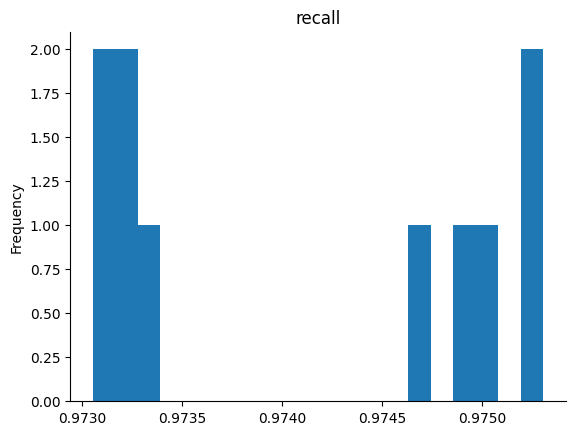

In [19]:
from matplotlib import pyplot as plt
results['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
evaluation = edge_prediction_evaluation(
    holdouts_kwargs=dict(train_size=0.8),
    graphs=graph,
    models=[DecisionTreeEdgePrediction()],
    number_of_holdouts=5,
    node_features=embeddings.values,  # Use simplified embedding features
    smoke_test=False
)


In [14]:
results = evaluation
filename = "results_"+view_name+"_FirstOrderLINE.csv"
results.to_csv(filename)
results

,evaluation_mode,train_size,validation_unbalance_rate,use_scale_free_distribution,prevalence_threshold,prevalence,balanced_accuracy,positive_likelyhood_ratio,negative_likelyhood_ratio,diagnostic_odds_ratio,...,"(model_parameters, criterion)","(model_parameters, splitter)","(model_parameters, max_depth)","(model_parameters, min_samples_split)","(model_parameters, min_samples_leaf)","(model_parameters, min_weight_fraction_leaf)","(model_parameters, max_features)","(model_parameters, max_leaf_nodes)","(model_parameters, min_impurity_decrease)","(model_parameters, ccp_alpha)"
0,train,0.8,1.0,True,0.501814,0.5,0.492967,0.985589,1.587247,0.620943,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
1,test,0.8,1.0,True,0.501616,0.5,0.493731,0.987153,1.523143,0.648103,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
0,train,0.8,1.0,True,0.501760,0.5,0.493151,0.986016,1.669435,0.590629,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
1,test,0.8,1.0,True,0.501507,0.5,0.494131,0.988015,1.571572,0.628680,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
0,train,0.8,1.0,True,0.507333,0.5,0.472309,0.943023,2.977540,0.316712,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
1,test,0.8,1.0,True,0.507429,0.5,0.471949,0.942296,3.022168,0.311795,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
0,train,0.8,1.0,True,0.501053,0.5,0.496119,0.991613,1.104132,0.898092,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
1,test,0.8,1.0,True,0.501134,0.5,0.495821,0.990971,1.112315,0.890908,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
0,train,0.8,1.0,True,0.502608,0.5,0.492211,0.979352,1.063455,0.920915,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
1,test,0.8,1.0,True,0.504779,0.5,0.485821,0.962486,1.116208,0.862282,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0


In [15]:
# Separate train and test results
train_results = evaluation[evaluation['evaluation_mode'] == 'train']
test_results = evaluation[evaluation['evaluation_mode'] == 'test']

# Function to compute mean metrics for a given evaluation mode
def compute_mean_metrics(data):
    results = []
    for holdout in data['holdout_number'].unique():
        holdout_data = data[data['holdout_number'] == holdout]

        # Calculate mean values for metrics
        auc_score = holdout_data['auroc'].mean()
        precision = holdout_data['precision'].mean()
        recall = holdout_data['recall'].mean()
        f1_score = holdout_data['f1_score'].mean()
        accuracy = holdout_data['accuracy'].mean()  # Assuming 'accuracy' column exists

        # Append results for this holdout
        results.append({
            'Holdout': holdout,
            'AUC': auc_score,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score,
            'Accuracy': accuracy
        })

    # Convert to DataFrame
    return pd.DataFrame(results)

# Compute metrics for train and test
train_metrics_df = compute_mean_metrics(train_results)
test_metrics_df = compute_mean_metrics(test_results)

# Calculate overall mean for train and test
overall_train_mean = train_metrics_df.mean(numeric_only=True)
overall_test_mean = test_metrics_df.mean(numeric_only=True)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Evaluation Mode': ['Train', 'Test'],
    'AUC': [overall_train_mean['AUC'], overall_test_mean['AUC']],
    'Precision': [overall_train_mean['Precision'], overall_test_mean['Precision']],
    'Recall': [overall_train_mean['Recall'], overall_test_mean['Recall']],
    'F1 Score': [overall_train_mean['F1 Score'], overall_test_mean['F1 Score']],
    'Accuracy': [overall_train_mean['Accuracy'], overall_test_mean['Accuracy']]
})

# Display the summary of mean metrics
print(summary_df)


  Evaluation Mode       AUC  Precision    Recall  F1 Score  Accuracy
0           Train  0.506625   0.494173  0.900210  0.636713  0.489351
1            Test  0.506103   0.493415  0.898442  0.635570  0.488290
